In [1]:
from fastai.vision import *

Set a `path` variable to be used later.

In [7]:
path = Path('downloads')
classes = ['dog', 'fried_chicken']

Print all the classes, and `verify_images` removes any invalid images.

In [8]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

Import all of our images into an `ImageDataBunch`.

In [9]:
np.random.seed(69)
data = ImageDataBunch.from_folder(
    path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4
).normalize(imagenet_stats)

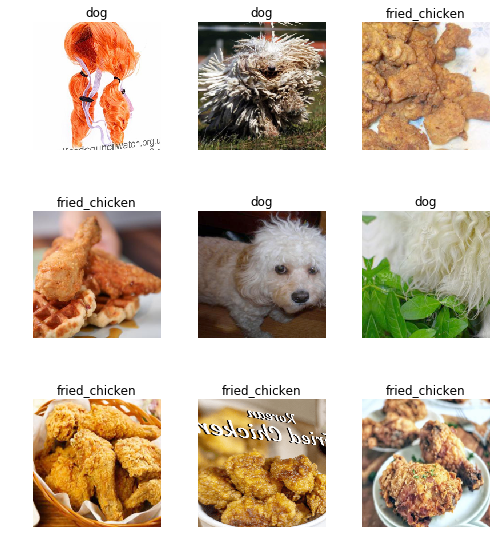

In [11]:
data.show_batch(rows=3, figsize=(7,8))

In [12]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['dog', 'fried_chicken'], 2, 471, 117)

## Training The Model

In [13]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/jupyter/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 92090423.28it/s]


In [14]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.481833,0.029251,0.008547,00:07
1,0.237669,0.002443,0.000000,00:04
2,0.154734,0.001490,0.000000,00:03
3,0.109473,0.001340,0.000000,00:03


Store our current weights.

In [15]:
learn.save('stage-1')

Unlock model parameters.

In [16]:
learn.unfreeze()

Find optimal learning rate.

In [17]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


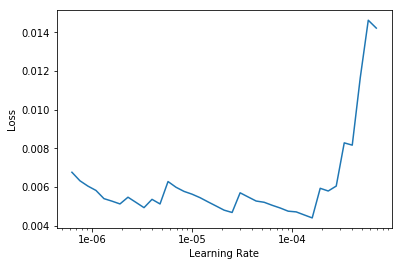

In [18]:
learn.recorder.plot()

Fit again, using our newly found optimal learning rate.

In [19]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.005106,0.002263,0.000000,00:04
1,0.004384,0.000703,0.000000,00:04


In [20]:
learn.save('stage-2')

## Interpretation

In [21]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (471 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
dog,dog,dog,dog,dog
Path: downloads;

Valid: LabelList (117 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
dog,dog,fried_chicken,dog,fried_chicken
Path: downloads;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats

In [22]:
interp = ClassificationInterpretation.from_learner(learn)

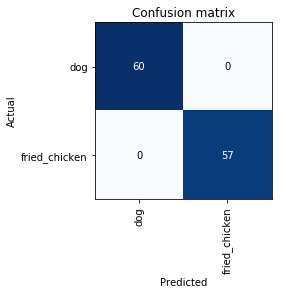

In [23]:
interp.plot_confusion_matrix()

## Production

In [24]:
learn.export()

In [25]:
learn = load_learner(path)

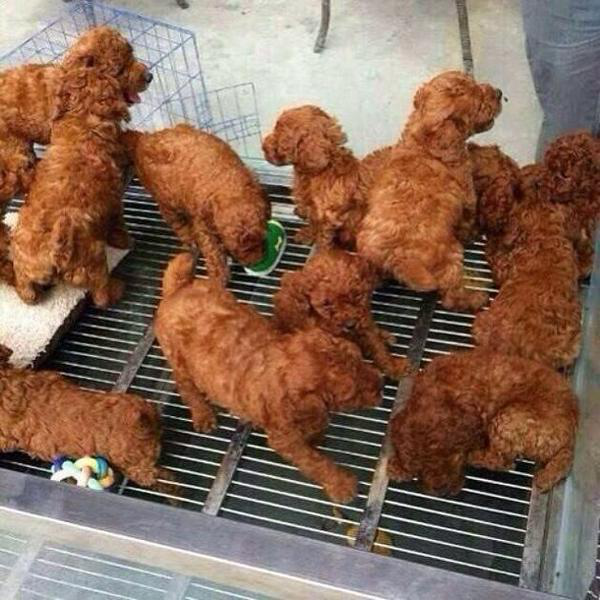

In [26]:
img = open_image('manual_test_images/fried_chicken_1.jpg')
img

In [28]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category dog